## Heat Map
indicating laplacian of each point on the drum surface in the scattering domain

In [8]:
import hitdifferentparts
import IPython.display as ipd
import numpy as np
import autograd
import torch
from kymatio import Scattering1D

from torch.autograd import backward
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook

sample from 1/8 of the drum surface, resolution is 0.05

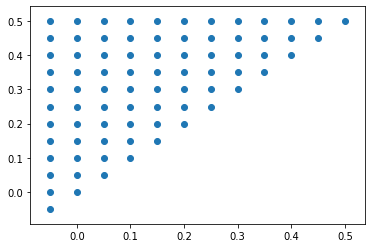

In [126]:
x_alt = []
y_alt = []
for i in range(len(x_sel)):
    if x_sel[i]<=0.5 and y_sel[i]<=0.5 and x_sel[i]<=y_sel[i]:
        x_alt.append(x_sel[i])
        y_alt.append(y_sel[i])
plt.scatter(x_alt,y_alt)

In [127]:
print(len(x_sel),len(x_alt),len(y_sel),len(y_alt))

529 78 529 78


529 78 529 78


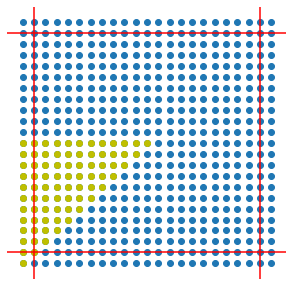

In [133]:
d = 1/20
x = np.linspace(0-d,1+d,21+2)
y = np.linspace(0-d,1+d,21+2)
x_sel = []
y_sel = []
x_alt = []
y_alt = []
for i in x:
    for j in y:
        x_sel.append(i)
        y_sel.append(j)
plt.figure(figsize=(5,5))
#Rectangle((0,0), 1, 1,linestyle='-')

for i in range(len(x_sel)):
    if x_sel[i]<=0.5 and y_sel[i]<=0.5 and x_sel[i]<=y_sel[i]:
        x_alt.append(x_sel[i])
        y_alt.append(y_sel[i])
        
print(len(x_sel),len(x_alt),len(y_sel),len(y_alt))

        
plt.scatter(x_sel,y_sel)
#plt.scatter(x_sel,y_sel,c='k')
plt.scatter(x_alt,y_alt,c='y')
plt.axvline(x=0,color = 'r')
plt.axvline(x=1,color = 'r')
plt.axhline(y=0,color = 'r')
plt.axhline(y=1,color = 'r')
plt.axis('off')
plt.show()
#plt.xlim([0,1])
#plt.ylim([0,1])

dictionary that forms mapping between points that are equivalent to each other.

scattering transform on each point in the set

matrix of scattering transfrom of the entire surface

and then get matrix of laplacian of each point

make coordinate mapping dictionary

In [10]:
x1 = [round(i,2) for i in x]
y1 = [round(i,2) for i in y]

In [11]:
coord_set = {}
# (0.1,0.9) = (0.9,0.1) = {0.9,0.9} = {0.1,0.1}
tot = 0
for i in x1[1:-1]:
    for j in y1[1:-1]:
        tot+=1
        tempset = {(i,j),(round(1-i,2),round(1-j,2)),(round(1-i,2),j),(i,round(1-j,2)),(j,i),(round(1-j,2),round(1-i,2)),(j,round(1-i,2)),(round(1-j,2),i)}
        count = 0
        for coord in tempset:
            if coord not in coord_set.keys():
                count += 1
        if count == len(tempset):
            coord_set[coord] = list(tempset)
print(coord_set.keys(),len(coord_set.keys()))
        

dict_keys([(1.0, 1.0), (1.0, 0.05), (1.0, 0.9), (1.0, 0.85), (1.0, 0.8), (1.0, 0.25), (1.0, 0.7), (1.0, 0.35), (1.0, 0.4), (1.0, 0.55), (0.5, 0.0), (0.95, 0.95), (0.9, 0.05), (0.85, 0.05), (0.8, 0.05), (0.75, 0.05), (0.7, 0.05), (0.65, 0.05), (0.6, 0.05), (0.55, 0.05), (0.95, 0.5), (0.9, 0.9), (0.85, 0.1), (0.8, 0.1), (0.75, 0.1), (0.7, 0.1), (0.65, 0.1), (0.6, 0.1), (0.55, 0.1), (0.9, 0.5), (0.85, 0.85), (0.8, 0.15), (0.75, 0.15), (0.7, 0.15), (0.65, 0.15), (0.6, 0.15), (0.55, 0.15), (0.85, 0.5), (0.8, 0.8), (0.75, 0.2), (0.7, 0.2), (0.65, 0.2), (0.6, 0.2), (0.55, 0.2), (0.8, 0.5), (0.75, 0.75), (0.7, 0.25), (0.65, 0.25), (0.6, 0.25), (0.55, 0.25), (0.75, 0.5), (0.7, 0.7), (0.65, 0.3), (0.6, 0.3), (0.55, 0.3), (0.7, 0.5), (0.65, 0.35), (0.6, 0.35), (0.55, 0.35), (0.65, 0.5), (0.6, 0.4), (0.55, 0.4), (0.6, 0.5), (0.55, 0.55), (0.55, 0.5), (0.5, 0.5)]) 66


make the sound sets

In [12]:
sounds_set = {}
for key in coord_set.keys():
    y = hitdifferentparts.hitdiffparts(key[0],key[1])
    if np.isnan(max(y)) == True:
        y = np.zeros(len(y))
    sounds_set[key] = y

--- 1.320533037185669 seconds ---
--- 1.310539960861206 seconds ---
--- 1.3308608531951904 seconds ---
--- 1.6004459857940674 seconds ---
--- 1.5876939296722412 seconds ---
--- 1.335592269897461 seconds ---
--- 1.4395067691802979 seconds ---
--- 1.468644142150879 seconds ---
--- 1.4444317817687988 seconds ---
--- 1.3499631881713867 seconds ---
--- 1.3824188709259033 seconds ---
--- 1.36403489112854 seconds ---
--- 1.3849396705627441 seconds ---
--- 1.4434690475463867 seconds ---
--- 1.3983831405639648 seconds ---
--- 1.4170558452606201 seconds ---
--- 1.4111509323120117 seconds ---
--- 1.411228895187378 seconds ---
--- 1.4278829097747803 seconds ---
--- 1.4363510608673096 seconds ---
--- 1.4427728652954102 seconds ---
--- 1.4926390647888184 seconds ---
--- 1.4521737098693848 seconds ---
--- 1.5111689567565918 seconds ---
--- 1.516474962234497 seconds ---
--- 1.5926918983459473 seconds ---
--- 1.465588092803955 seconds ---
--- 1.4570801258087158 seconds ---
--- 1.4618749618530273 second

In [16]:
sounds_set.keys()

dict_keys([(1.0, 1.0), (1.0, 0.05), (1.0, 0.9), (1.0, 0.85), (1.0, 0.8), (1.0, 0.25), (1.0, 0.7), (1.0, 0.35), (1.0, 0.4), (1.0, 0.55), (0.5, 0.0), (0.95, 0.95), (0.9, 0.05), (0.85, 0.05), (0.8, 0.05), (0.75, 0.05), (0.7, 0.05), (0.65, 0.05), (0.6, 0.05), (0.55, 0.05), (0.95, 0.5), (0.9, 0.9), (0.85, 0.1), (0.8, 0.1), (0.75, 0.1), (0.7, 0.1), (0.65, 0.1), (0.6, 0.1), (0.55, 0.1), (0.9, 0.5), (0.85, 0.85), (0.8, 0.15), (0.75, 0.15), (0.7, 0.15), (0.65, 0.15), (0.6, 0.15), (0.55, 0.15), (0.85, 0.5), (0.8, 0.8), (0.75, 0.2), (0.7, 0.2), (0.65, 0.2), (0.6, 0.2), (0.55, 0.2), (0.8, 0.5), (0.75, 0.75), (0.7, 0.25), (0.65, 0.25), (0.6, 0.25), (0.55, 0.25), (0.75, 0.5), (0.7, 0.7), (0.65, 0.3), (0.6, 0.3), (0.55, 0.3), (0.7, 0.5), (0.65, 0.35), (0.6, 0.35), (0.55, 0.35), (0.65, 0.5), (0.6, 0.4), (0.55, 0.4), (0.6, 0.5), (0.55, 0.55), (0.55, 0.5), (0.5, 0.5)])

make scattering sets

In [17]:
def getsc(y, J=4):
    """
    this function outputs scattering transform of a time-domain signal.
    """
    N = len(y)
    scattering = Scattering1D(J = J,shape=(N,))
    Sy = scattering(y)
    return Sy

In [20]:
scattering_set = {}
for key in sounds_set.keys():
    y = sounds_set[key]
    Sy = getsc(torch.Tensor(y))
    scattering_set[key] = Sy

In [21]:
nully = np.zeros(len(y))
scattering_set['null'] = getsc(torch.Tensor(nully))

get laplacian of the entire surface

In [22]:
getscattering(0.35, 0.55) - getscattering(0.45, 0.35)

NameError: name 'getscattering' is not defined

In [499]:
getscattering(0, 0.4)

really (1, 0.4)


tensor([[ 3.6012e-01,  2.8023e-01,  1.2046e-01,  ..., -4.3772e-08,
          6.5193e-07,  1.1325e-06],
        [ 9.7011e-03,  9.3357e-03,  8.4252e-03,  ...,  8.6147e-09,
          8.8476e-09,  8.3819e-09],
        [ 2.2074e-02,  2.1127e-02,  1.8831e-02,  ...,  1.3039e-08,
          1.3039e-08,  1.1176e-08],
        ...,
        [ 5.6502e-03,  5.1574e-03,  4.0483e-03,  ...,  2.3283e-10,
          4.6566e-10,  0.0000e+00],
        [ 1.8203e-03,  1.5935e-03,  1.0963e-03,  ...,  3.4925e-10,
          4.6566e-10,  3.4925e-10],
        [ 8.2376e-04,  7.4801e-04,  5.8198e-04,  ...,  2.9104e-10,
          2.9104e-10,  2.3283e-10]])

In [487]:
m1 = 1
m2 = 1
k = (np.sin(m1 * np.pi * 1))**2 * (np.sin(m2 * np.pi * 0.3))**2/[1,2]
k = np.round(k,10)
print(k)

[0. 0.]


In [7]:
y = hitdifferentparts.hitdiffparts(0,0.5)
print(y)
ipd.Audio(y,rate=44100)

--- 1.8369946479797363 seconds ---
[nan nan nan ... nan nan nan]


In [457]:
a = getscattering(0,0.5)
print(a)

really (0.5, 0)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [29]:
def getscattering(i,j):
    #get scattering coefficients from coordinate
    coordset = {(i,j),(round(1-i,2),round(1-j,2)),(round(1-i,2),j),
                (i,round(1-j,2)),(j,i),(round(1-j,2),round(1-i,2)),
                (j,round(1-i,2)),(round(1-j,2),i)}
    count = 0
    for c in coordset:
        if c in scattering_set.keys():
            #print("really",c)
            break
        elif c not in scattering_set.keys():
            count += 1
    if count == len(coordset):
        c = 'null'
        #print(i,j)
    
    return scattering_set[c]

## ???Do I calculate norm of laplacian here or sum of laplacian vector

In [163]:
Lap_sum = np.zeros((len(x1[1:-1]),len(y1[1:-1])))
Lap_norm = np.zeros((len(x1[1:-1]),len(y1[1:-1])))
Lap_mean = np.zeros((len(x1[1:-1]),len(y1[1:-1])))
d = 0.05
for i,x in enumerate(x1[2:-2]):
    for j,y in enumerate(y1[2:-2]):
        lap = getscattering(x,y) - 0.25 * (getscattering(round(x+d,2),y)+getscattering(round(x-d,2),y)
                           +getscattering(x,round(y+d,2))+getscattering(x,round(y-d,2))) 
        #lap = lap/(1e-6+getscattering(x,y))
        lap = lap/(torch.norm(getscattering(x,y)))
        #print(getscattering(x,y))
        Lap_sum[i+1,j+1] = torch.sum(lap)
        Lap_norm[i+1,j+1] = torch.norm(lap)
        #if Lap_norm[i,j] == 0:
        #    print(i,j,round(x-d,2),y)
        Lap_mean[i+1,j+1] = torch.mean(lap)

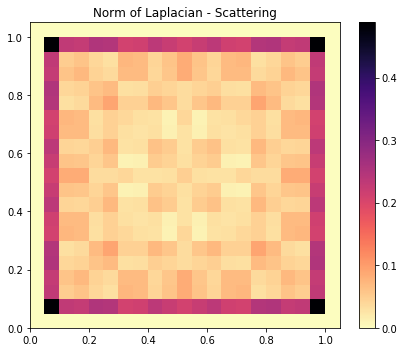

In [164]:
fig,ax = plt.subplots()
fig.set_size_inches(6, 5)
c = ax.pcolormesh(x1[1:], y1[1:], Lap_norm, cmap='magma_r', vmin=np.min(Lap_norm), vmax=np.max(Lap_norm))
plt.title('Norm of Laplacian - Scattering')
fig.tight_layout()
fig.colorbar(c, ax=ax)
plt.show()

In [165]:
np.max(Lap_norm)

0.488090842962265

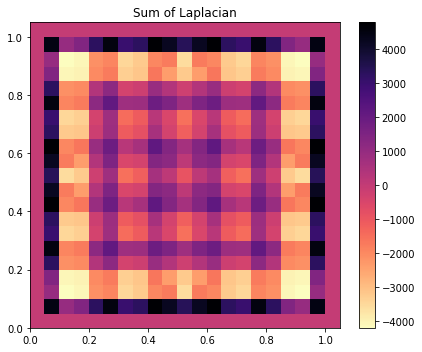

In [98]:
fig,ax = plt.subplots()
fig.set_size_inches(6, 5)
c = ax.pcolormesh(x1[1:], y1[1:], Lap_sum, cmap='magma_r', vmin=np.min(Lap_sum), vmax=np.max(Lap_sum))
plt.title('Sum of Laplacian')
fig.tight_layout()
fig.colorbar(c, ax=ax)
plt.show()

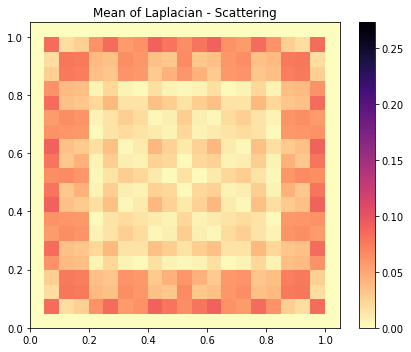

In [135]:
fig,ax = plt.subplots()
fig.set_size_inches(6, 5)
c = ax.pcolormesh(x1[1:], y1[1:], np.abs(Lap_mean), cmap='magma_r', vmin=0, vmax=0.273)
plt.title('Mean of Laplacian - Scattering')
fig.tight_layout()
fig.colorbar(c, ax=ax)
plt.show()